In [3]:
from __future__ import absolute_import, division, print_function, unicode_literals 
# tensorflow와 tf.keras 불러오기~ 
import tensorflow as tf 
from tensorflow import keras 
# helper library 임포트 
import numpy as np 
import matplotlib.pyplot as plt 

print(tf.__version__)

2.3.0


In [4]:
# 패션 MNIST 데이터셋은 텐서플로에서 바로 임포트하여 적재할 수 있습니다: 
fasion_mnist = keras.datasets.fashion_mnist 
(train_X, train_y), (test_X, test_y) = fasion_mnist.load_data() 
# 데이터셋에 클래스 이름이 들어있지 않기 때문에(0~9의 숫자로 레이블링됨) 
# 이미지를 출력할 때 사용하기 위해 별도의 변수를 만들어 저장합니다:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

4423680/4422102 [==============================] - 0s 0us/step


In [5]:
train_X.shape

(60000, 28, 28)

In [6]:
test_X.shape

(10000, 28, 28)

In [7]:
set(train_y)

{0, 1, 2, 3, 4, 5, 6, 7, 8, 9}

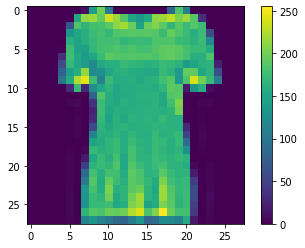

In [8]:
plt.figure()
plt.imshow(train_X[10]) 
plt.colorbar() 
plt.grid(False) 
plt.show()

In [11]:
train_X = train_X / 255.0 
test_X = test_X / 255.0

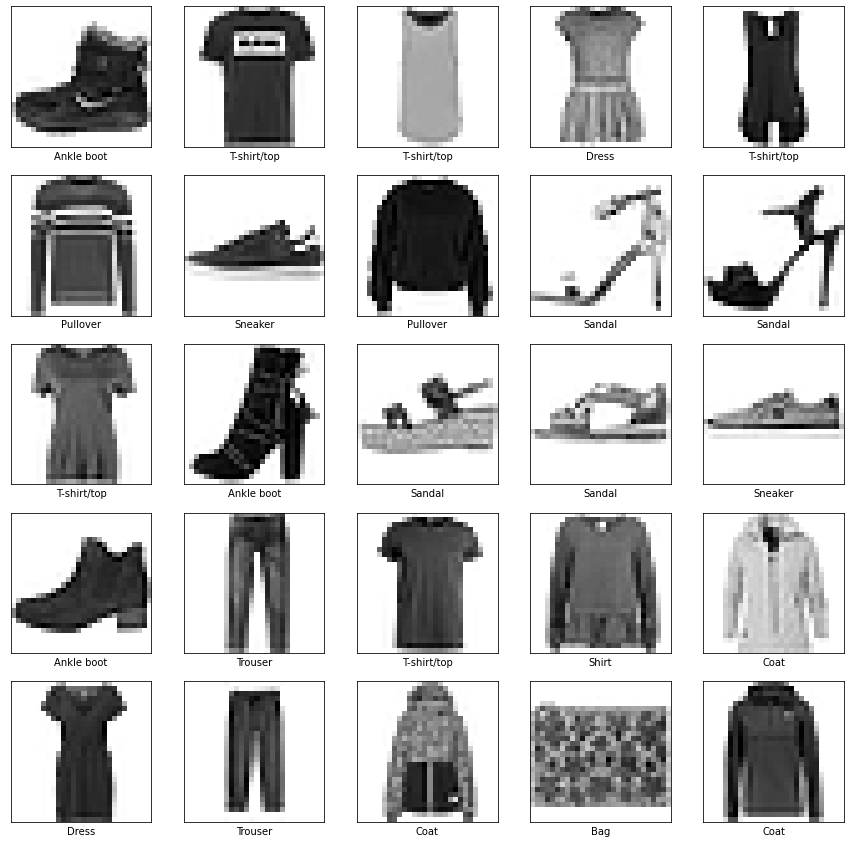

In [12]:
plt.figure(figsize = (15,15))
for i in range(25): 
  plt.subplot(5,5, i+1) #5x5 subplot에서 i+1번째 subplot을 의미함 
  plt.xticks([]) #x축에 눈금을 없애는 역할 
  plt.yticks([]) #x축에 눈금을 없애는 역할 
  plt.grid(False) 
  plt.imshow(train_X[i], cmap = plt.cm.binary) #cmap = plt.cm.binary 는 흑백으로 보이게 
  plt.xlabel(class_names[train_y[i]]) 
plt.show()

In [13]:
model = keras.Sequential([ 
    keras.layers.Flatten(input_shape=(28,28)), 
    keras.layers.Dense(128, activation=tf.nn.relu), 
    keras.layers.Dense(10, activation=tf.nn.softmax) 
])

In [14]:
model.compile(optimizer = 'adam', 
              loss = 'sparse_categorical_crossentropy', 
              metrics = ['accuracy'])

In [15]:
model.fit(train_X, train_y, epochs = 8)

Epoch 1/8
1875/1875 [==============================] - 4s 2ms/step - loss: 0.5041 - accuracy: 0.8222
Epoch 2/8
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3785 - accuracy: 0.8636
Epoch 3/8
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3382 - accuracy: 0.8771
Epoch 4/8
1875/1875 [==============================] - 5s 3ms/step - loss: 0.3170 - accuracy: 0.8844
Epoch 5/8
1875/1875 [==============================] - 5s 3ms/step - loss: 0.2980 - accuracy: 0.8907
Epoch 6/8
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2834 - accuracy: 0.8943
Epoch 7/8
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2706 - accuracy: 0.8988
Epoch 8/8
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2603 - accuracy: 0.9025


In [16]:
predictions = model.predict(test_X)

print(predictions[0]) 
print([round(p, 4) for p in predictions[0]])

[1.0663275e-06 4.0484171e-08 6.9244564e-08 9.5218823e-08 4.8771792e-08
 8.0497732e-04 3.9156516e-06 1.5373302e-02 1.3311711e-05 9.8380315e-01]
[0.0, 0.0, 0.0, 0.0, 0.0, 0.0008, 0.0, 0.0154, 0.0, 0.9838]


In [18]:
print(np.argmax(predictions[0]))

9


In [19]:
test_y[0]

9

In [20]:
def plot_image(i, predict_arr, true_label, img): 
  predict_arr, true_label, img = predict_arr[i], true_label[i], img[i] 
  plt.grid(False) 
  plt.xticks([]) 
  plt.yticks([]) 
  plt.imshow(img, cmap = plt.cm.binary) 
  predicted_label = np.argmax(predict_arr) 
  if predicted_label == true_label: 
    color = 'blue' 
  else: 
    color = 'red' 
  plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label], 
                                       100*np.max(predict_arr), 
                                       class_names[true_label]), color=color)

In [22]:
def plot_value_array(i, predict_arr, true_label):
  predict_arr, true_label = predict_arr[i], true_label[i] 
  plt.grid(False) 
  plt.xticks([])
  plt.yticks([]) 
  thisplot = plt.bar(range(10), predict_arr, color = "#777777" ) 
  plt.ylim([0,1]) 
  predicted_label = np.argmax(predict_arr) 
  thisplot[predicted_label].set_color('red') 
  thisplot[true_label].set_color('blue')

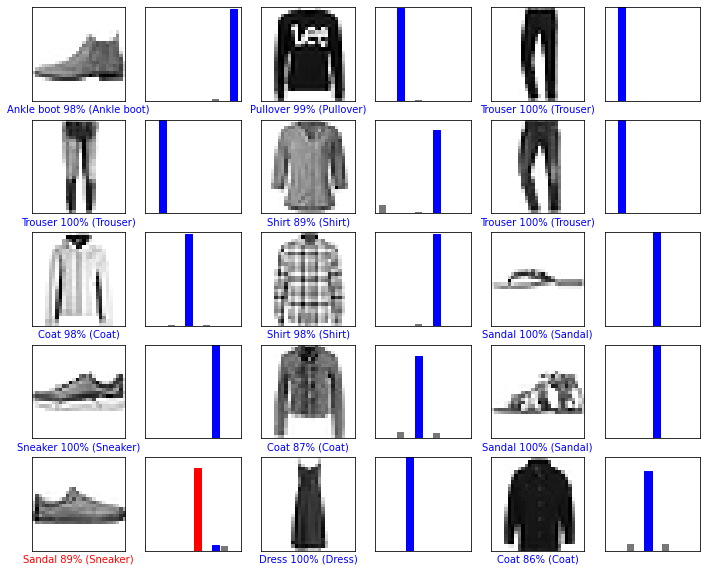

In [23]:
num_rows = 5 
num_cols = 3 
num_images = num_rows * num_cols 

plt.figure(figsize = (2*2*num_cols, 2*num_rows)) 
for i in range(num_images): #15개 
  plt.subplot(num_rows, 2*num_cols, 2*i+1) 
  plot_image(i, predictions, test_y, test_X) 
  plt.subplot(num_rows, 2*num_cols, 2*i+2) 
  plot_value_array(i, predictions, test_y) 
plt.show()

In [24]:
img = (np.expand_dims(test_X[100], 0)) 
pred = model.predict(img) 
print(pred[0])

[1.9547343e-03 7.6279690e-07 3.1905897e-06 9.9706429e-01 2.5870324e-05
 1.9747095e-07 9.4855920e-04 7.4175782e-10 2.3312466e-06 3.9018784e-09]


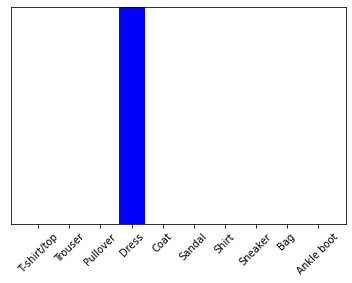

In [25]:
plot_value_array(0, pred, [test_y[100]]) 
plt.xticks(range(10), class_names, rotation = 45) 
plt.show()